Distance from the centre of the external magnet and the centre of the spinner = $65mm$
Green magnet and red magnet
We are tracking the angle of the spinner and comparing them with angles from the simulation
Output: table with center xy, red magnet xy, green magnet xy
calculate the xy with tangent

C0002 and C0004 have a spinner centre of ~ $x = (0 \pm 3)px, y = (0 \pm 3)px$

C0000 = oscillation as 50fps

C0002 = oscillation at 1000fps

C0004 = fast rotation at 1000fps

C0007 = slower rotation at 1000fps

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

%matplotlib widget

input_paths = [
    # "C0000", # oscillation
    "C0002", # oscillation
    "C0004", # fast
    "C0007", # slow
]

lmap = lambda f,x : list(map(f, x))

processed_graphs = {}

for in_path in input_paths:
    with open(in_path + ".csv", "r+") as read:
            # DATA
            data = read.readlines()[1:]
            data = lmap(lambda row: row.rstrip().split(","), data)

            tdata = lmap(lambda row: float(row[0]), data)
            tdata = np.linspace(0, 2, len(tdata))
            xdata = lmap(lambda row: float(row[1]), data)
            ydata = lmap(lambda row: float(row[2]), data)

            ang_data = np.arctan2(ydata, xdata)

            # continualize
            for i in range(len(ang_data) - 1):
                if ang_data[i] - ang_data[i+1] > np.pi:
                    for j in range(i+1, len(ang_data)):
                        ang_data[j] += 2*np.pi
                elif ang_data[i] - ang_data[i+1] < -np.pi:
                    for j in range(i+1, len(ang_data)):
                        ang_data[j] -= 2*np.pi

            # numerical differentiation
            d_ang_data = np.zeros(len(ang_data))
            dt = 1/1000
            for i in range(len(d_ang_data) - 1):
                d_ang_data[i+1] = (ang_data[i+1] - ang_data[i])/dt

            # smooothing
            sm_am = 15 # smoothing amount
            d_ang_data_smooth = np.convolve(d_ang_data, np.ones(sm_am)/sm_am,"same")
            
            # plt.plot()
            # plt.plot(tdata, ang_data)
            print(ang_data[0], -d_ang_data_smooth[0:-2][sm_am:-sm_am][0])
            # plt.plot(tdata[sm_am:-2-sm_am], -d_ang_data_smooth[sm_am:-2-sm_am])

            processed_graphs[in_path] = {
                "tdata": tdata,
                "xdata": xdata,
                "ydata": ydata,
                "ang_data": ang_data,
                "d_ang_data": d_ang_data,

                "tdata_smooth": tdata[sm_am:-2-sm_am],
                "d_ang_data_smooth": -d_ang_data_smooth[sm_am:-2-sm_am]
            }

2.1028868178870983 0.009777654614643683
1.4503371936979998 44.580454507782946
1.3452221419413335 9.48266437263682


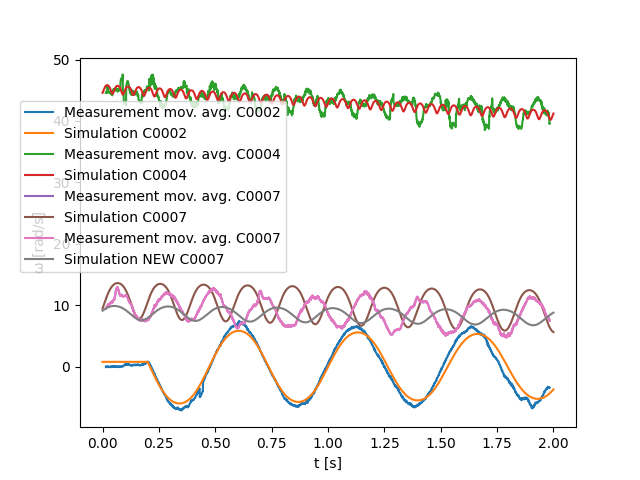

In [30]:
for in_path in input_paths:
    measured = processed_graphs[in_path]

    with open(f"sim/{in_path}_SIM.csv", "r+") as read:
        # DATA
        data = read.readlines()[1:]
        data = lmap(lambda row: row.rstrip().split(","), data)

        tdata = lmap(lambda row: float(row[0]), data)
        ydata = lmap(lambda row: float(row[1]), data)

        plt.plot(measured["tdata_smooth"], measured["d_ang_data_smooth"], label = f"Measurement mov. avg. {in_path}")

        plt.plot(tdata, ydata, label = f"Simulation {in_path}")

    try:
        with open(f"sim/{in_path}_SIM_NEW.csv", "r+") as read:
            # DATA
            data = read.readlines()[1:]
            data = lmap(lambda row: row.rstrip().split(","), data)

            tdata = lmap(lambda row: float(row[0]), data)
            ydata = lmap(lambda row: float(row[1]), data)

            plt.plot(measured["tdata_smooth"], measured["d_ang_data_smooth"], label = f"Measurement mov. avg. {in_path}")

            plt.plot(tdata, ydata, label = f"Simulation NEW {in_path}")
    except Exception:
        pass

plt.xlabel("t [s]")
plt.ylabel("ω [rad/s]")
plt.legend(bbox_to_anchor=(0.43, 0.4))

# Normal speed video

In [31]:
input_paths = [
    "C0000", # oscillation
    # "C0002", # oscillation
    # "C0004", # fast
    # "C0007", # slow
]

for in_path in input_paths:
    with open(in_path + ".csv", "r+") as read:
            # DATA
            data = read.readlines()[1:]
            data = lmap(lambda row: row.rstrip().split(","), data)

            tdata = lmap(lambda row: float(row[0]), data)
            # tdata = np.linspace(0, 2, len(tdata))
            xdata = lmap(lambda row: float(row[1]), data)
            ydata = lmap(lambda row: float(row[2]), data)

            ang_data = np.arctan2(ydata, xdata)

            # continualize
            for i in range(len(ang_data) - 1):
                if ang_data[i] - ang_data[i+1] > np.pi:
                    for j in range(i+1, len(ang_data)):
                        ang_data[j] += 2*np.pi
                elif ang_data[i] - ang_data[i+1] < -np.pi:
                    for j in range(i+1, len(ang_data)):
                        ang_data[j] -= 2*np.pi

            # numerical differentiation
            d_ang_data = np.zeros(len(ang_data))
            dt = 1/50
            for i in range(len(d_ang_data) - 1):
                d_ang_data[i+1] = (ang_data[i+1] - ang_data[i])/dt

            # smooothing
            sm_am = 1 # smoothing amount
            d_ang_data_smooth = np.convolve(d_ang_data, np.ones(sm_am)/sm_am,"same")
            
            # plt.plot()
            # plt.plot(tdata, ang_data)
            # print(ang_data[0], -d_ang_data_smooth[0:-2][sm_am:-sm_am][0])
            # plt.plot(tdata[sm_am:-2-sm_am], -d_ang_data_smooth[sm_am:-2-sm_am])

            processed_graphs[in_path] = {
                "tdata": tdata,
                "xdata": xdata,
                "ydata": ydata,
                "ang_data": ang_data,
                "d_ang_data": d_ang_data,

                "tdata_smooth": tdata[sm_am:-2-sm_am],
                "d_ang_data_smooth": -d_ang_data_smooth[sm_am:-2-sm_am]
            }

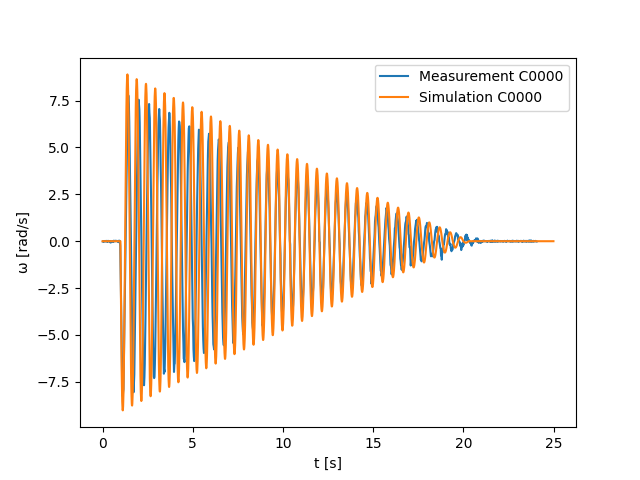

In [32]:
plt.figure()

for in_path in input_paths:
    measured = processed_graphs[in_path]

    with open(f"sim/{in_path}_SIM.csv", "r+") as read:
        # DATA
        data = read.readlines()[1:]
        data = lmap(lambda row: row.rstrip().split(","), data)

        tdata = lmap(lambda row: float(row[0]), data)
        ydata = lmap(lambda row: float(row[1]), data)

        plt.plot(measured["tdata_smooth"], measured["d_ang_data_smooth"], label = f"Measurement {in_path}")

        plt.plot(tdata, ydata, label = f"Simulation {in_path}")

plt.xlabel("t [s]")
plt.ylabel("ω [rad/s]")
plt.legend(loc="best")